# Machine Learing Time Series Model

### `Feature Engineering`

In [184]:
import pandas as pd
import os

In [185]:
from private.s3_aws import access_key, secret_access_key


In [186]:
data = pd.read_csv(f"s3://rawdatagrupo07/city_market_tracker.tsv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },sep='\t'
)

In [188]:
data.period_begin = pd.to_datetime(data.period_begin)
data.period_end = pd.to_datetime(data.period_end)

In [189]:
data.rename(columns = {'period_begin':'Date','city':'City','state_code':'State','median_list_price':'Price'},inplace=True)

In [190]:
prices_redfin = data[['Date','City', 'State','Price']]

In [191]:
cities = pd.read_csv(f"s3://cleandatagrupo07/cities.csv",
        storage_options={
            "key": access_key,
            "secret": secret_access_key
        }
    )

In [192]:
prices_redfin = pd.merge(prices_redfin, cities, how = 'inner', on=['State','City'])

In [193]:
prices_redfin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335673 entries, 0 to 3335672
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   City            object        
 2   State           object        
 3   Price           float64       
 4   Unique_City_ID  object        
 5   County          object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 178.1+ MB


In [194]:
prices_redfin = prices_redfin[['State','Date','Price']]

In [195]:
prices_redfin.dropna(inplace=True)

In [196]:
prices_redfin.head()

,State,Date,Price
0,NJ,2012-02-01,232400.0
1,NJ,2014-03-01,247800.0
2,NJ,2013-07-01,240949.5
3,NJ,2014-08-01,245949.5
4,NJ,2014-02-01,162500.0


In [197]:
prices_redfin.Date.max()

Timestamp('2022-09-01 00:00:00')

### Zillow

In [198]:
zillow = pd.read_csv(f"s3://rawdatagrupo07/City_time_series.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

In [200]:
zillow.Date = pd.to_datetime(zillow.Date)

In [201]:
zillow.rename(columns = {'RegionName':'Unique_City_ID'}, inplace = True)

In [202]:
zillow_city = pd.merge(zillow, cities, how = 'inner', on=['Unique_City_ID'])

In [203]:
prices_zillow = zillow_city[['State', 'Date','MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence']]

In [204]:
price_house_names = ['MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence']

In [205]:
prices_zillow['Price'] = prices_zillow.mean(axis='columns',numeric_only=True)

/var/folders/wh/7jr3ry9j3cb9x1sd3ncj65w40000gn/T/ipykernel_1181/3623342846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_zillow['Price'] = prices_zillow.mean(axis='columns',numeric_only=True)


In [206]:
prices_zillow.drop(columns=price_house_names,axis=1,inplace=True)

/var/folders/wh/7jr3ry9j3cb9x1sd3ncj65w40000gn/T/ipykernel_1181/17747031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_zillow.drop(columns=price_house_names,axis=1,inplace=True)


In [207]:
prices_zillow.head()

,State,Date,Price
0,PA,1996-04-30,NaN
1,PA,1996-05-31,NaN
2,PA,1996-06-30,NaN
3,PA,1996-07-31,NaN
4,PA,1996-08-31,NaN


In [208]:
prices_zillow.dropna(inplace=True)

/var/folders/wh/7jr3ry9j3cb9x1sd3ncj65w40000gn/T/ipykernel_1181/482823920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_zillow.dropna(inplace=True)


In [209]:
prices_zillow.head()

,State,Date,Price
687,MD,2010-01-31,198050.0
688,MD,2010-02-28,195000.0
689,MD,2010-03-31,193700.0
690,MD,2010-04-30,199475.0
691,MD,2010-05-31,199900.0


In [210]:
prices_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479944 entries, 687 to 3730395
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   State   479944 non-null  object        
 1   Date    479944 non-null  datetime64[ns]
 2   Price   479944 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.6+ MB


In [211]:
prices_zillow.Date.max()

Timestamp('2017-12-31 00:00:00')

In [212]:
prices_zillow.Date.min()

Timestamp('2010-01-31 00:00:00')

### Zillow + Redfin

In [213]:
price = pd.concat([prices_redfin,prices_zillow])

In [214]:
price.head()

,State,Date,Price
0,NJ,2012-02-01,232400.0
1,NJ,2014-03-01,247800.0
2,NJ,2013-07-01,240949.5
3,NJ,2014-08-01,245949.5
4,NJ,2014-02-01,162500.0


In [215]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375787 entries, 0 to 3730395
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   State   object        
 1   Date    datetime64[ns]
 2   Price   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 103.0+ MB


In [216]:
price_by_state = price.groupby(['State','Date'],as_index=False).median()

In [217]:
price_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   10900 non-null  object        
 1   Date    10900 non-null  datetime64[ns]
 2   Price   10900 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 255.6+ KB


In [218]:
price_usa = price.groupby(['Date'],as_index=False).median(numeric_only = True)

In [219]:
price_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    225 non-null    datetime64[ns]
 1   Price   225 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB


### `Model`

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

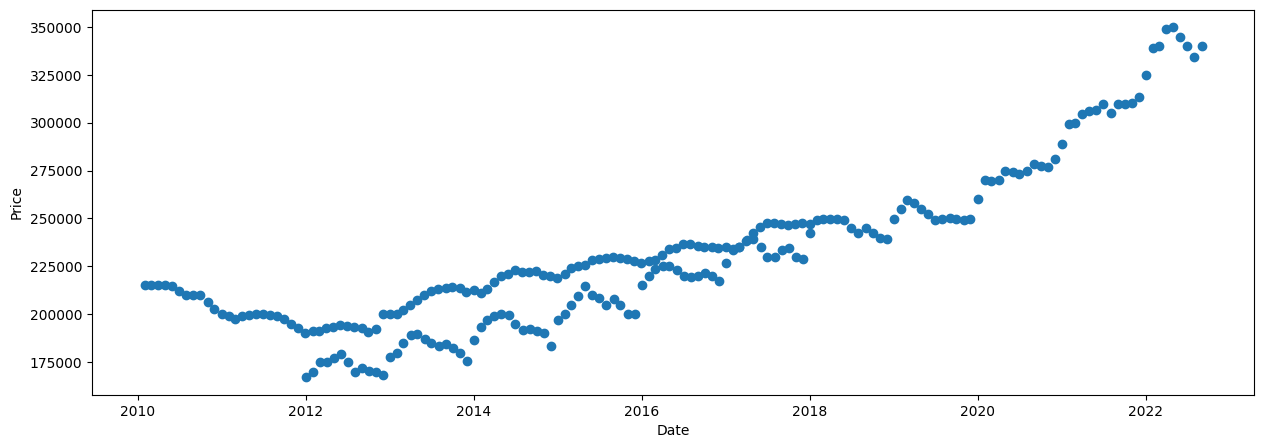

In [221]:
plt.figure(figsize = (15,5))
plt.plot_date(x='Date',y='Price',xdate=True,data=price_usa)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### `Resample`

#### Monthly

In [222]:
price_monthly = price_usa.resample('M', on = 'Date').median()
price_monthly.head()

,Price
Date,
2010-01-31,214963.333333
2010-02-28,215425.000000
2010-03-31,215387.500000
2010-04-30,215000.000000
2010-05-31,214650.000000


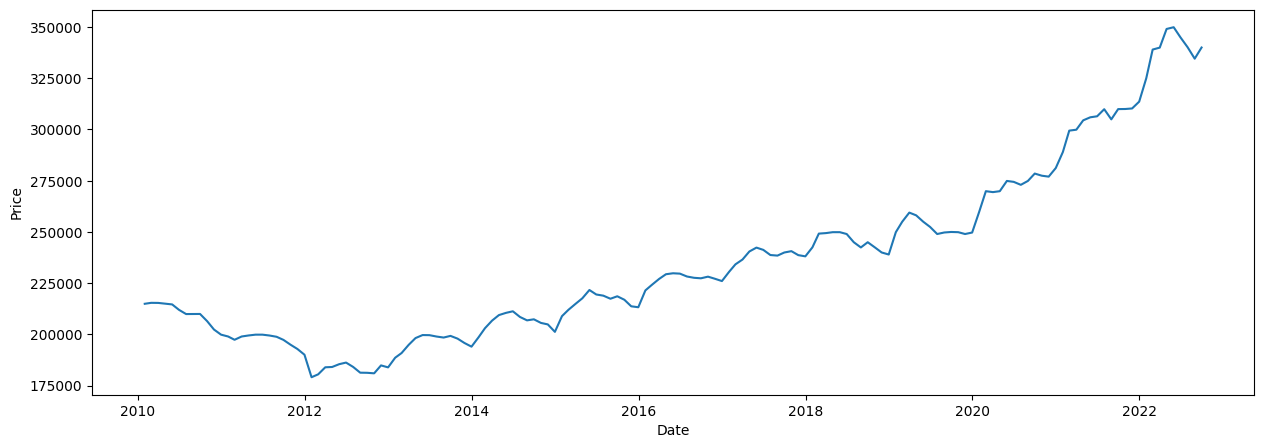

In [223]:
plt.figure(figsize = (15,5))

plt.plot(price_monthly.index, price_monthly.Price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Yearly

In [224]:
price_yearly = price_usa.resample('Y', on = 'Date').median()
price_yearly.head()

,Price
Date,
2010-12-31,211000.000000
2011-12-31,198932.500000
2012-12-31,184906.833333
2013-12-31,194700.000000
2014-12-31,205337.270833


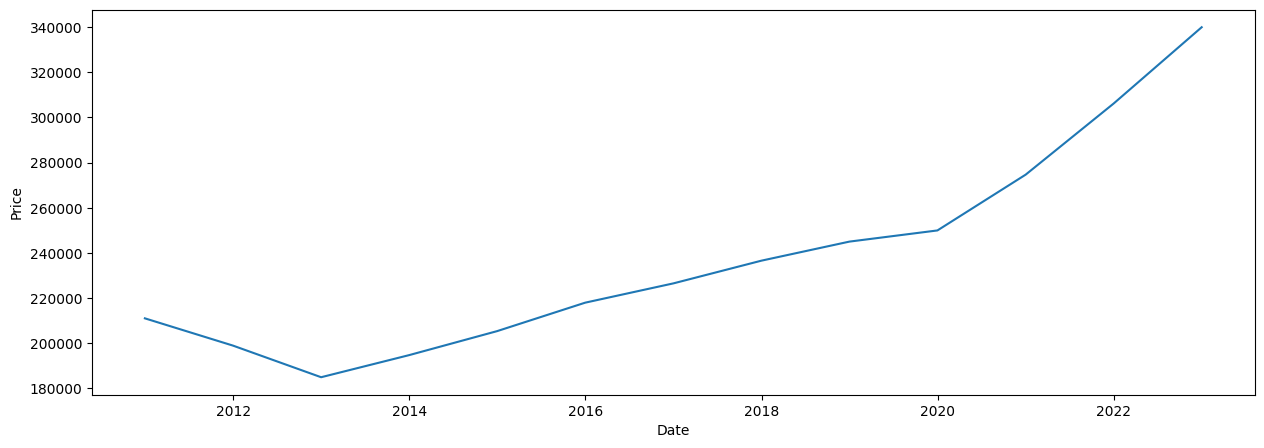

In [225]:
plt.figure(figsize = (15,5))

plt.plot(price_yearly.index, price_yearly.Price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### `Checking seasonality`

In [226]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(price_monthly['Price'])

In [227]:
#H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.
#H1: The time series is stationary.

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('p is less than 0.05, then we can reject the null hypothesis and conclude that the time series is stationary.')
    else:
        print('The time series is non-stationary.')

In [228]:
adfuller_test(price_monthly['Price'])

ADF Test Statistic : 0.7608466679939901
p-value : 0.9909771367953104
#Lags Used : 12
Number of Observations Used : 140
The time series is non-stationary.


### `ACF / PACF to understand the order of the model`

In [229]:
import statsmodels as sm

In [230]:
from statsmodels.graphics import tsaplots

### Removing the trend

In [231]:
price_monthly['Price First Difference'] = price_monthly['Price'] - price_monthly['Price'].shift(1)


In [232]:
adfuller_test(price_monthly['Price First Difference'].dropna())

ADF Test Statistic : -1.4873153724999228
p-value : 0.5397766507018408
#Lags Used : 11
Number of Observations Used : 140
The time series is non-stationary.


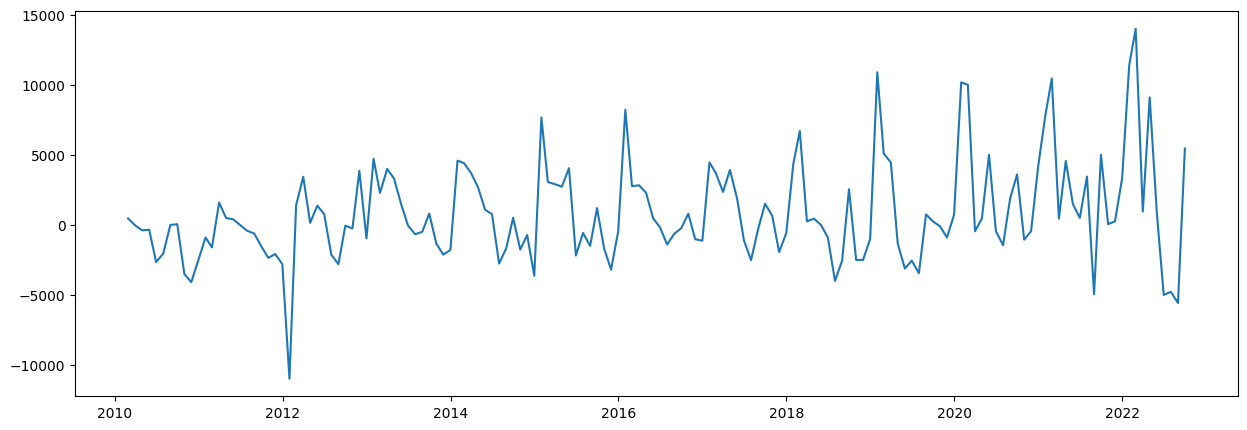

In [233]:
plt.figure(figsize=(15,5))

plt.plot(price_monthly['Price First Difference'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


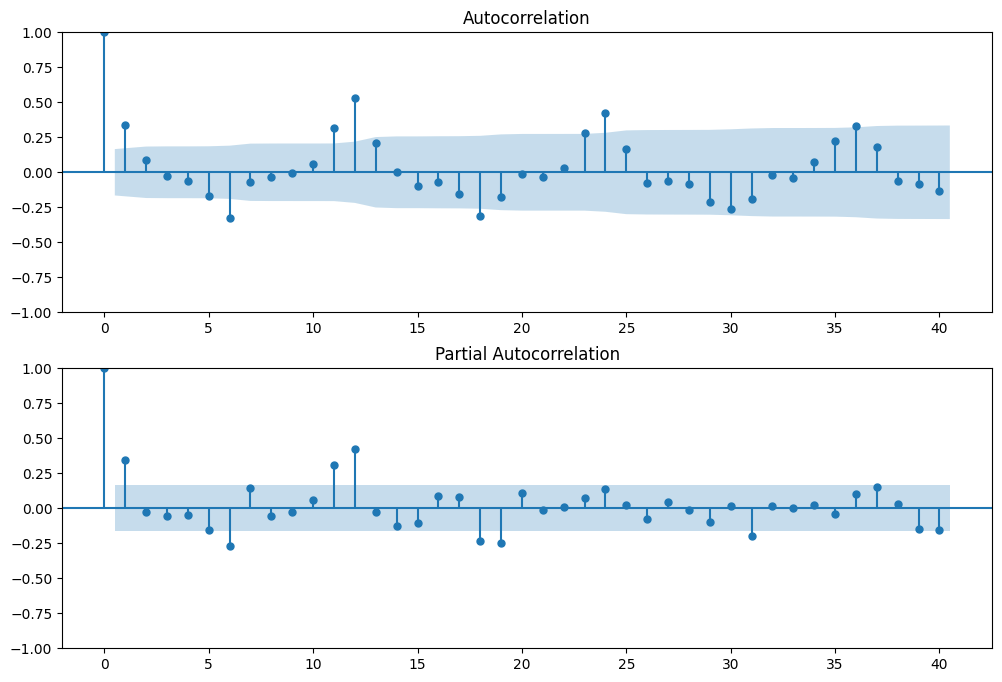

In [234]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(price_monthly['Price First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(price_monthly['Price First Difference'].iloc[13:],lags=40,ax=ax2)

We can see there's a significant partial autocorrelation at 12. This means that the price at a certain month depends on the price at the same month a year ago.

In [235]:
price_monthly['Seasonal First Difference'] = price_monthly['Price'] - price_monthly['Price'].shift(12)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


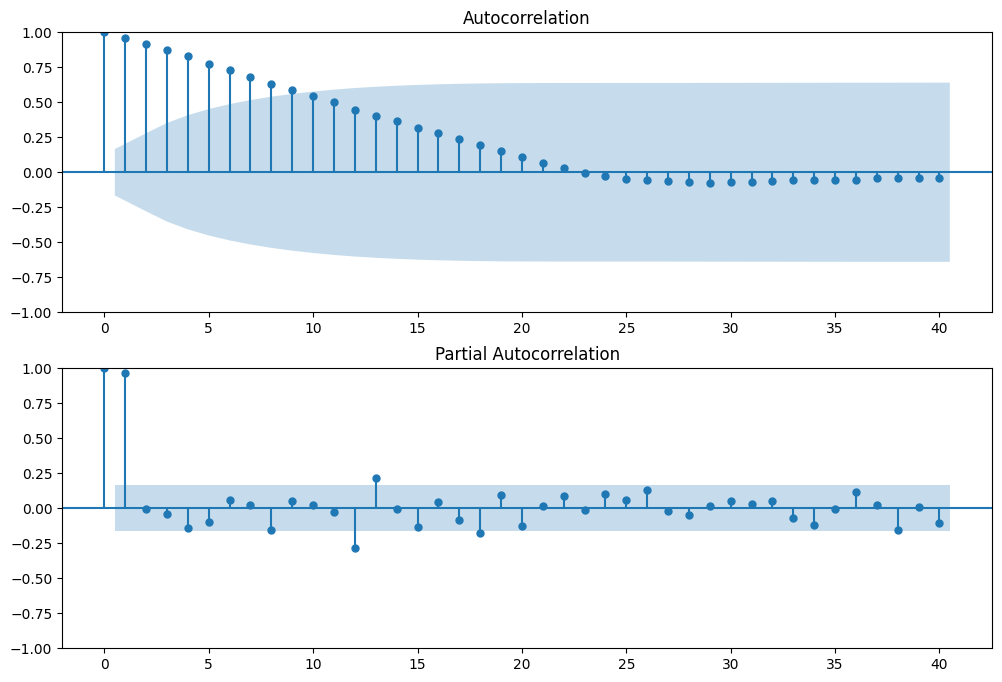

In [236]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(price_monthly['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(price_monthly['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [237]:
price_monthly['Seasonal Second Difference'] = price_monthly['Seasonal First Difference'] - price_monthly['Seasonal First Difference'].shift(1)


In [238]:
adfuller_test(price_monthly['Seasonal Second Difference'].dropna())

ADF Test Statistic : -4.148943438630773
p-value : 0.0008030270867705149
#Lags Used : 11
Number of Observations Used : 128
p is less than 0.05, then we can reject the null hypothesis and conclude that the time series is stationary.


### `Sarima model`

In [239]:
import statsmodels as sm

The AR part of ARIMA shows that the time series is regressed on its own past data. The MA part of ARIMA indicates that the forecast error is a linear combination of past respective errors. The I part of ARIMA shows that the data values have been replaced with differenced values of d order to obtain stationary data, which is the requirement of the ARIMA model approach.

In [259]:
model=sm.tsa.statespace.sarimax.SARIMAX(price_monthly['Price'],order=(0, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11683D+01    |proj g|=  1.19925D+01

At iterate    5    f=  8.56144D+00    |proj g|=  2.89061D-01

At iterate   10    f=  8.50555D+00    |proj g|=  5.01317D-01

At iterate   15    f=  8.49999D+00    |proj g|=  5.39258D-05

At iterate   20    f=  8.49998D+00    |proj g|=  5.22138D-03


 This problem is unconstrained.



At iterate   25    f=  8.49904D+00    |proj g|=  1.27098D-01

At iterate   30    f=  8.49571D+00    |proj g|=  3.76426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     47      1     0     0   5.789D-04   8.496D+00
  F =   8.4957063467000040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [260]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Price   No. Observations:                  153
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1299.843
Date:                              Mon, 05 Dec 2022   AIC                           2605.686
Time:                                      00:05:03   BIC                           2614.511
Sample:                                  01-31-2010   HQIC                          2609.272
                                       - 09-30-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5989      0.098     -6.123      0.000      -0.791      -0.407
ma.S.L12       0.6473      0.089      7.296      0.000       0.473       0.821
sigma2      6.831e+06   1.41e-09   4.83e+15      0.000    6.83e+06    6.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                11.50
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+32. Standard errors may be unstable.
"""

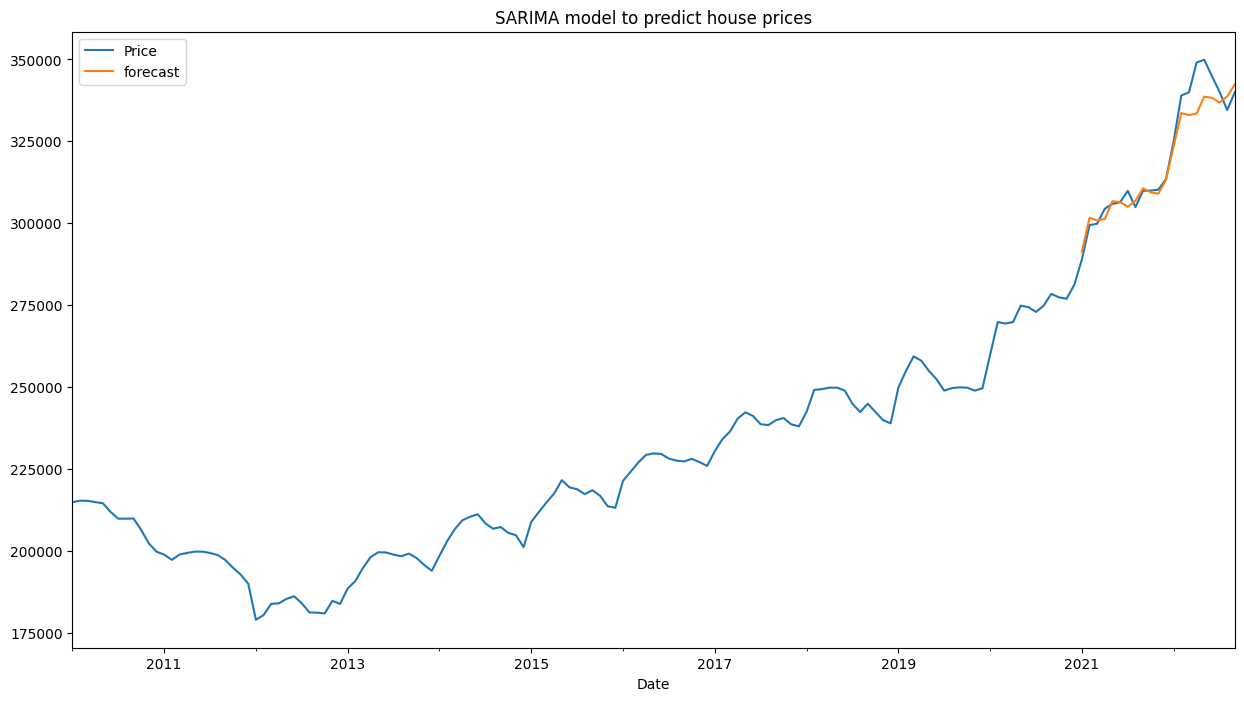

In [261]:
price_monthly['forecast']=results.predict(start=132,end=152,dynamic=True)
price_monthly[['Price','forecast']].plot(figsize=(15,8))
plt.title('SARIMA model to predict house prices')
plt.show()

In [278]:
from pandas.tseries.offsets import DateOffset

future_dates = [price_monthly.index[-1]+ DateOffset(months=x)for x in range(0,16)] # 16 months

In [279]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=price_monthly.columns)

In [280]:
future_df = pd.concat([price_monthly,future_dates_df])


In [246]:
# 20 months --> test set (from January 2021 to September 2022)

In [281]:
future_df['forecast'] = results.predict(start = 132, end = 168, dynamic= True)  

In [282]:
future_df.dropna(how='all',inplace=True)

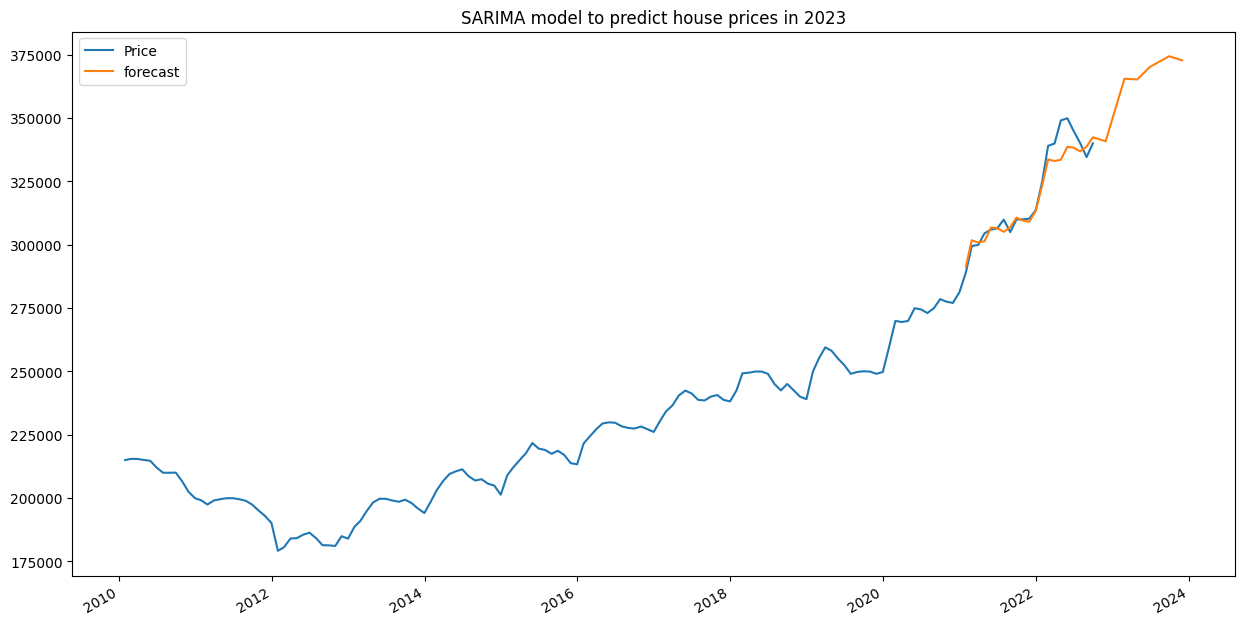

In [283]:
future_df['forecast'] = results.predict(start = 132, end = 188, dynamic= True)  
future_df[['Price','forecast']].plot(figsize=(15, 8)) 
plt.title('SARIMA model to predict house prices in 2023')
plt.show()